In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [4]:
provider = pd.read_csv('Train-1542865627584.csv')
bene = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')

In [5]:
inpatient['patient_type'] = 'inpatient'

In [6]:
outpatient['patient_type'] = 'outpatient'

In [7]:
patients = pd.concat([inpatient,outpatient], axis = 0)

In [8]:
patients.shape

(558211, 31)

In [9]:
merged_data = patients.merge(bene, how = 'left', on = 'BeneID')

In [10]:
final_patients = merged_data.merge(provider, how = 'left', on = 'Provider')

In [11]:
final_patients.shape

(558211, 56)

In [12]:
#making a copy of merged data
patient_record = final_patients.copy()

## Type of patients 

In [13]:
patient_record.groupby(['PotentialFraud', 'patient_type'])['patient_type'].count().reset_index(name= 'patient_count')

,PotentialFraud,patient_type,patient_count
0,No,inpatient,17072
1,No,outpatient,328343
2,Yes,inpatient,23402
3,Yes,outpatient,189394


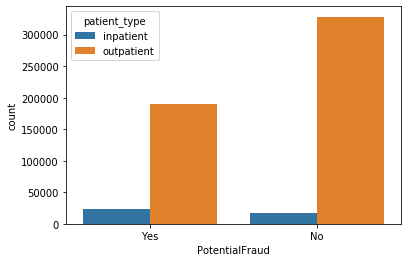

In [14]:
sns.countplot(data = patient_record, x = 'PotentialFraud', hue = 'patient_type')

In [24]:
patient_record.groupby(['patient_type','PotentialFraud'])['patient_type'].count().reset_index(name= 'patient_count')

,patient_type,PotentialFraud,patient_count
0,inpatient,No,17072
1,inpatient,Yes,23402
2,outpatient,No,328343
3,outpatient,Yes,189394


Text(0.5, 1.0, 'Comparative chart based on patient type \namong Fraudulent and Non-Fraudulent providers')

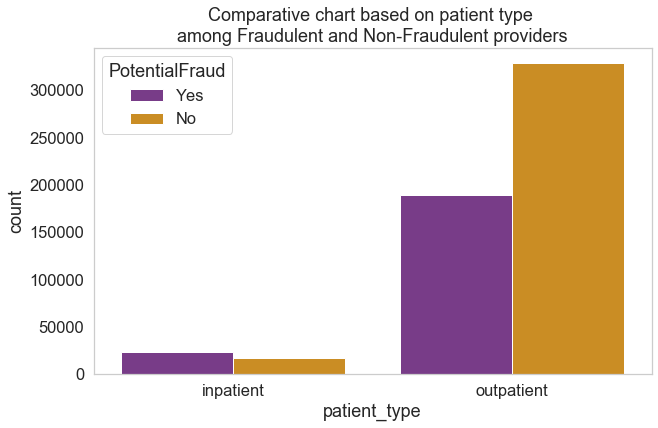

In [102]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.countplot(data = patient_record, x = 'patient_type', hue = 'PotentialFraud', palette= 'CMRmap')
ax.set_title('Comparative chart based on patient type \namong Fraudulent and Non-Fraudulent providers')

## Analysis of State feature

In [62]:
inpatient_record = patient_record[patient_record['patient_type'] == 'inpatient']
outpatient_record = patient_record[patient_record['patient_type'] == 'outpatient']

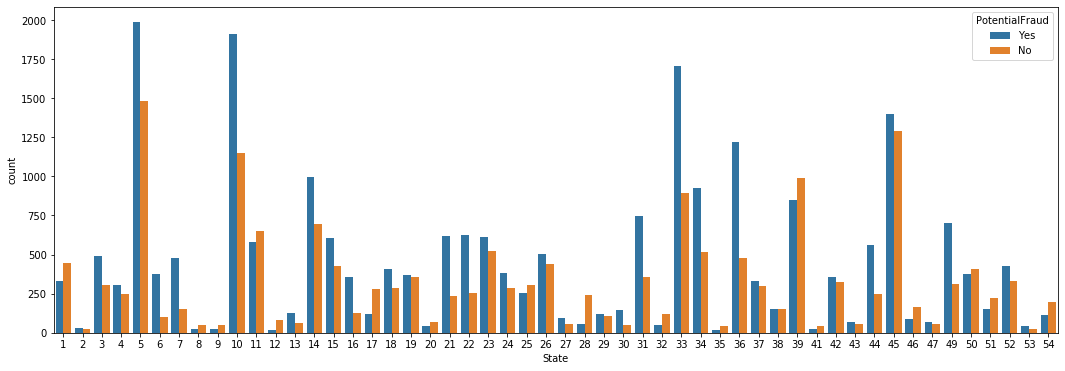

In [50]:
plt.rcParams['figure.figsize'] = (18, 6)
sns.countplot(data = inpatient_record, x = 'State', hue = 'PotentialFraud')

In [84]:
fraud = patient_record[patient_record['PotentialFraud'] == 'Yes']
nonfraud = patient_record[patient_record['PotentialFraud'] == 'No']

In [56]:
fraud.groupby(['patient_type', 'State'])['State'].size()

patient_type  State
inpatient     1         334
              2          33
              3         494
              4         304
              5        1986
                       ... 
outpatient    50       4405
              51        311
              52       1523
              53        432
              54        842
Name: State, Length: 104, dtype: int64

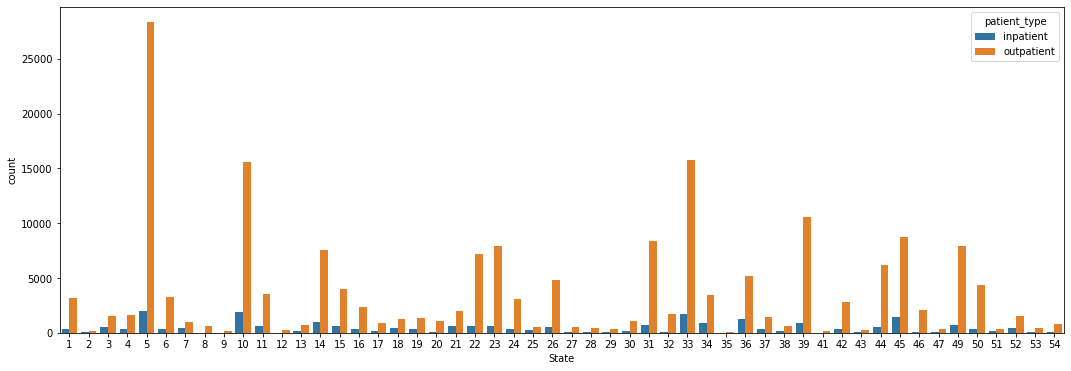

In [66]:
#comparative State count between inpatients and outpatients for fradulant data
sns.countplot(data = fraud, x = 'State', hue = 'patient_type')

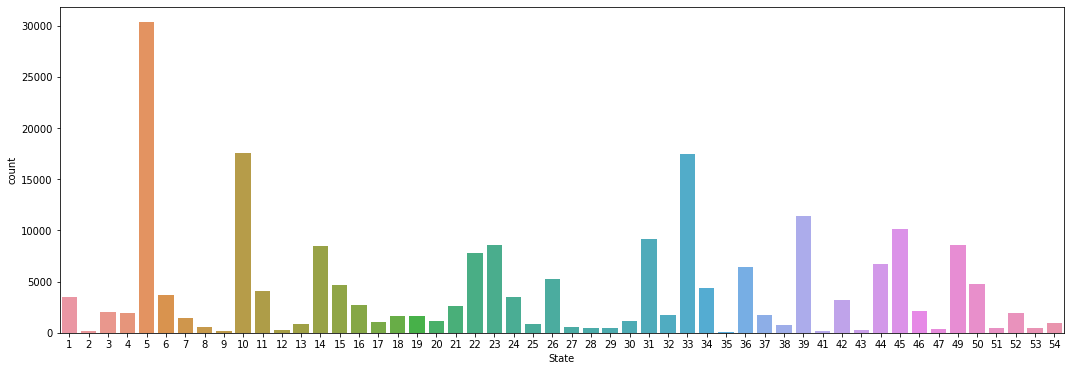

In [57]:
#States count plot for only fradulant providers(for combined data)
sns.countplot(data = fraud, x = 'State')

In [88]:
fraud.State.value_counts()

5     30335
10    17512
33    17492
39    11448
45    10135
31     9112
49     8613
23     8538
14     8509
22     7798
44     6709
36     6381
26     5301
50     4782
15     4635
34     4385
11     4123
6      3666
1      3525
24     3453
42     3180
16     2733
21     2576
46     2124
3      2030
52     1953
4      1945
37     1780
32     1739
19     1687
18     1679
7      1470
30     1184
20     1118
17     1016
54      957
13      858
25      819
38      770
8       612
27      576
28      516
53      478
51      466
29      429
47      402
43      316
12      308
2       207
9       178
41      156
35       82
Name: State, dtype: int64

Text(0.5, 1.0, 'States with most fradulant providers')

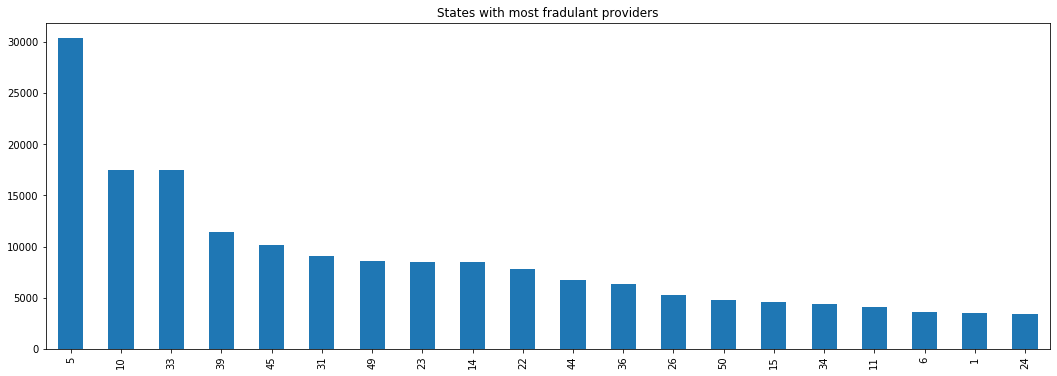

In [98]:
#Sorted States count plot for only fradulant providers(for combined data)
fraud['State'].value_counts().head(20).plot.bar()
plt.title('Top 20 States with most fradulant providers')

Text(0.5, 1.0, 'Top 20 States with most fradulant providers for inpatients')

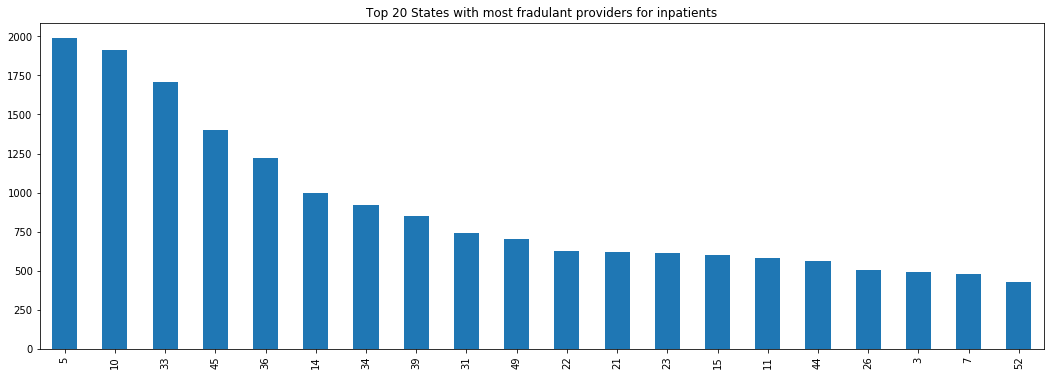

In [99]:
inpatient_record[inpatient_record['PotentialFraud'] == 'Yes']['State'].value_counts().head(20).plot.bar()
plt.title('Top 20 States with most fradulant providers for inpatients')

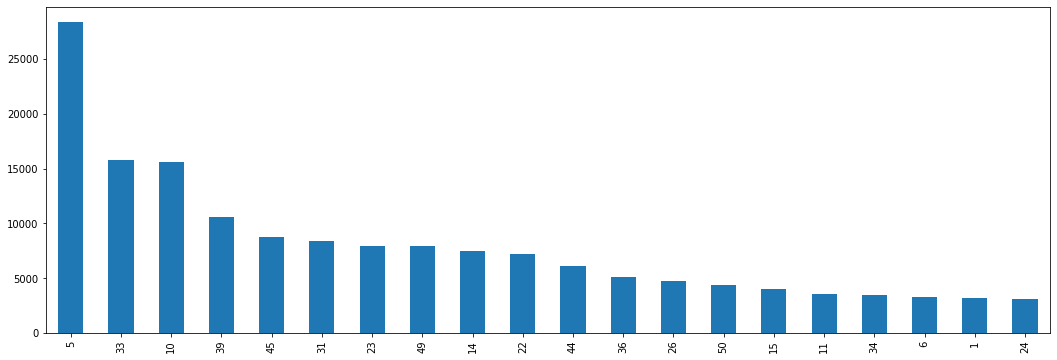

In [97]:
outpatient_record[outpatient_record['PotentialFraud'] == 'Yes']['State'].value_counts().head(20).plot.bar()
plt.title('Top 20 States with most fradulant providersfpr outpatient data')

In [74]:
state_data2 = patient_record.groupby(['State', 'patient_type', 'PotentialFraud'])['PotentialFraud'].count()\
                                        .reset_index(name = 'state_count')

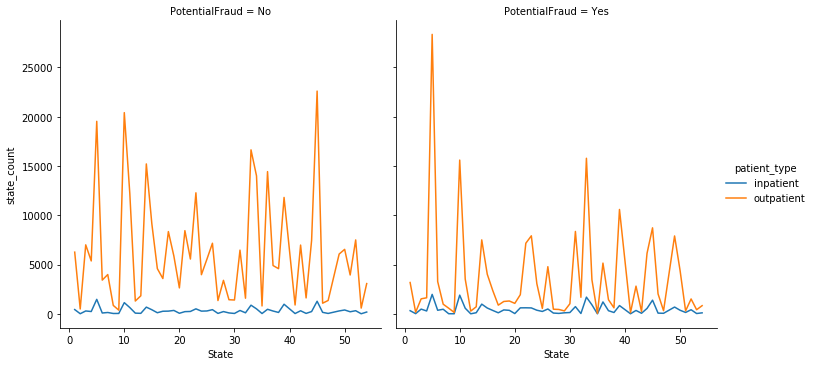

In [82]:
sns.relplot(data = state_data2, x = 'State', y = 'state_count', col = 'PotentialFraud', hue = 'patient_type', kind = 'line')

## Gender 

In [101]:
patient_record.groupby(['Gender','PotentialFraud'])['PotentialFraud'].count().reset_index(name = 'gender_count')

,Gender,PotentialFraud,gender_count
0,1,No,145414
1,1,Yes,89683
2,2,No,200001
3,2,Yes,123113


In [108]:
89683/(145414 +89683)#ratio of gender 1 having fradulant data

0.38147232844315326

In [109]:
123113/(200001 + 123113)#ratio of gender 2 having fradulant data

0.38102032100125655

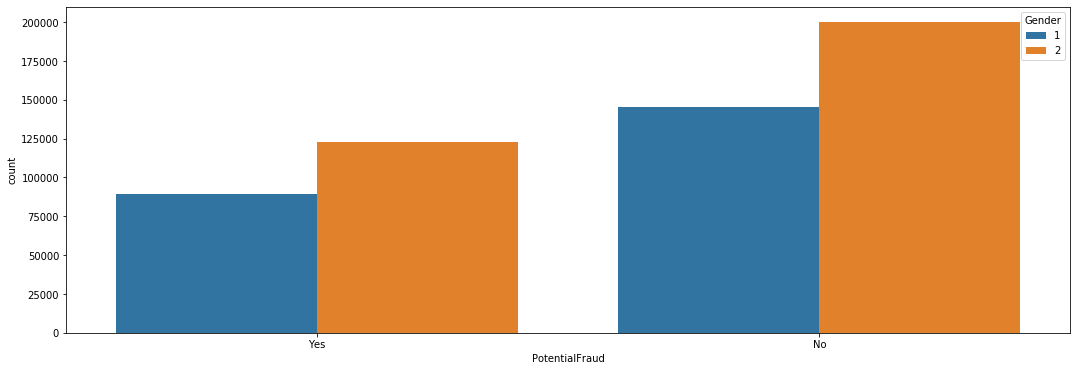

In [103]:
sns.countplot(data = patient_record, x = 'PotentialFraud', hue = 'Gender')

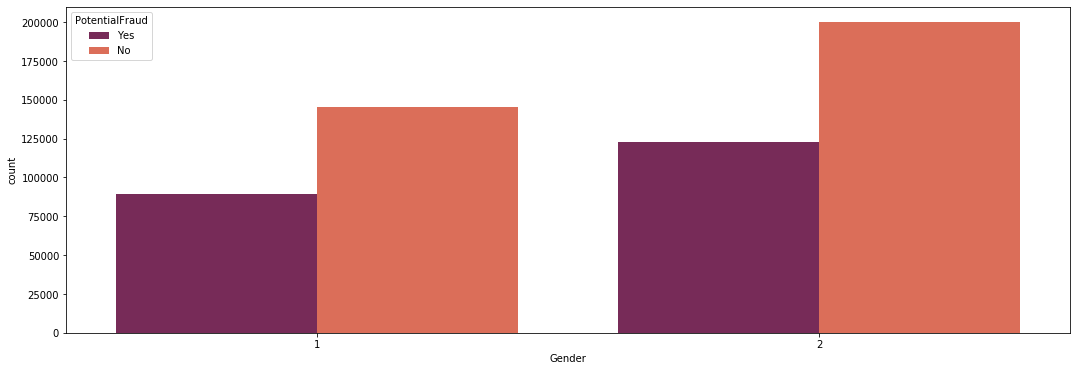

In [107]:

sns.countplot(data = patient_record, x = 'Gender', hue = 'PotentialFraud', palette = 'rocket')

Fradulant providers does not depend on gender

## Age

In [22]:
patient_record.DOD.unique()

array([nan, '2009-05-01', '2009-08-01', '2009-07-01', '2009-06-01',
       '2009-12-01', '2009-11-01', '2009-04-01', '2009-10-01',
       '2009-03-01', '2009-09-01', '2009-02-01'], dtype=object)

In [23]:
patient_record[['DOB', 'ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt']] = \
    patient_record[['DOB', 'ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt']].apply(pd.to_datetime, 
                                                                                               format ='%Y-%m-%d')

In [24]:
patient_record['Age'] = patient_record['ClaimStartDt'].dt.year.astype(int) - patient_record['DOB'].dt.year.astype(int)

In [104]:
def agecal(x):
    if (x > 90) and (x <= 100):
        return '91-100'
    elif (x > 80) and (x <= 90):
        return '81-90'
    elif (x >70) and (x <=80):
        return '71-80'
    elif (x > 60) and (x <= 70):
        return '61-70'
    elif (x >50) and (x <=60):
        return '51-60'
    elif (x > 40) and (x <= 90):
        return '41-50'
    elif (x >30) and (x <=40):
        return '31-40'
    else:
        return "< 30"

In [105]:
patient_record['Age_range'] = patient_record['Age'].apply(agecal)

In [27]:
patient_record.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'patient_type', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depressi

In [106]:
age_range = patient_record.groupby('Age_range') ['PotentialFraud'].value_counts().reset_index(name = 'count')

In [107]:
age_range

,Age_range,PotentialFraud,count
0,31-40,No,7206
1,31-40,Yes,4289
2,41-50,No,14036
3,41-50,Yes,8464
4,51-60,No,23161
5,51-60,Yes,13583
6,61-70,No,80866
7,61-70,Yes,49209
8,71-80,No,118232
9,71-80,Yes,73029


Text(0.5, 1.0, 'Number of cases for different age groups for Fraudulent and non-Fraudulent providers')

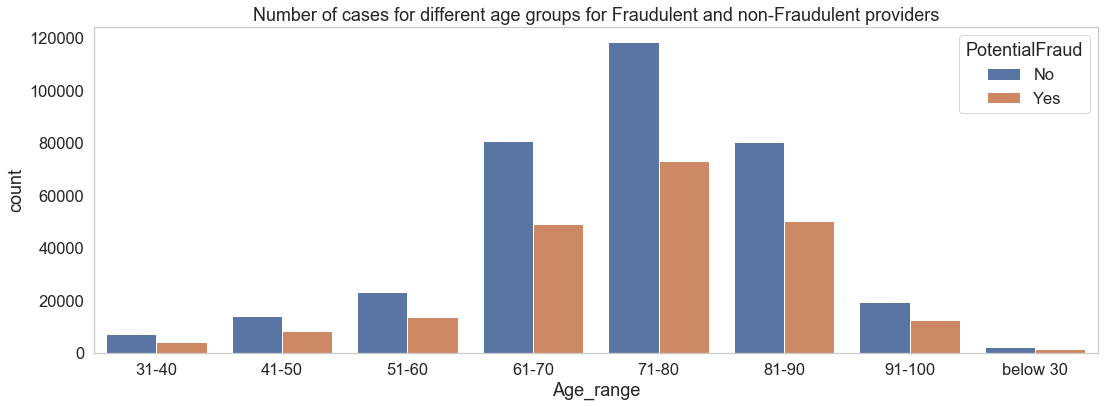

In [103]:
plt.rcParams['figure.figsize'] = (18, 6)
ax = sns.barplot(data = age_range, x = 'Age_range', y = 'count', hue = 'PotentialFraud')
ax.set_title('Number of cases for different age groups for Fraudulent and non-Fraudulent providers')

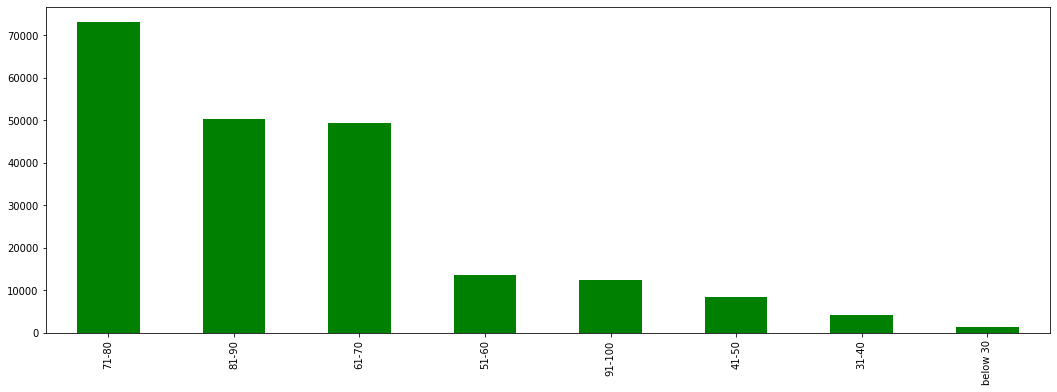

In [130]:
patient_record.loc[patient_record.PotentialFraud == 'Yes'].Age_range.value_counts().plot.bar(color = 'green')

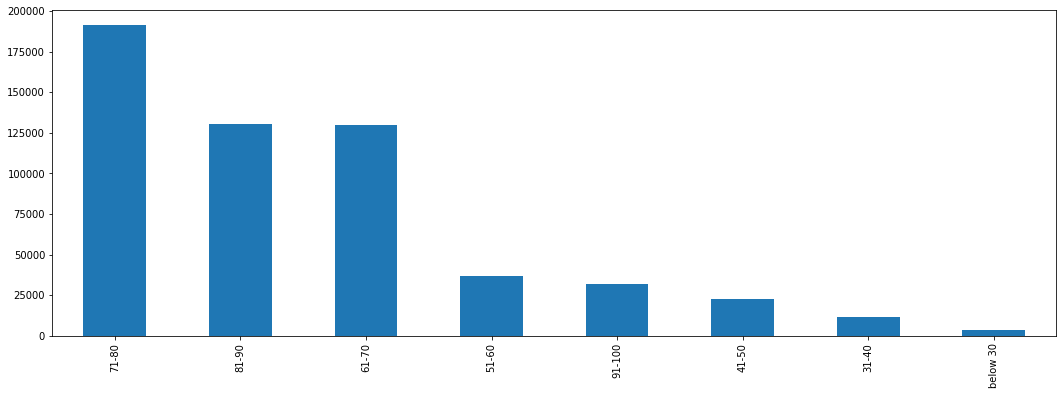

In [132]:
patient_record.Age_range.value_counts().plot.bar()

In [139]:
age_data = patient_record.groupby(['Age_range', 'patient_type', 'PotentialFraud'])['PotentialFraud'].count()\
                                        .reset_index(name = 'age_count')

In [140]:
age_data

,Age_range,patient_type,PotentialFraud,age_count
0,31-40,inpatient,No,344
1,31-40,inpatient,Yes,460
2,31-40,outpatient,No,6862
3,31-40,outpatient,Yes,3829
4,41-50,inpatient,No,683
5,41-50,inpatient,Yes,960
6,41-50,outpatient,No,13353
7,41-50,outpatient,Yes,7504
8,51-60,inpatient,No,1124
9,51-60,inpatient,Yes,1573


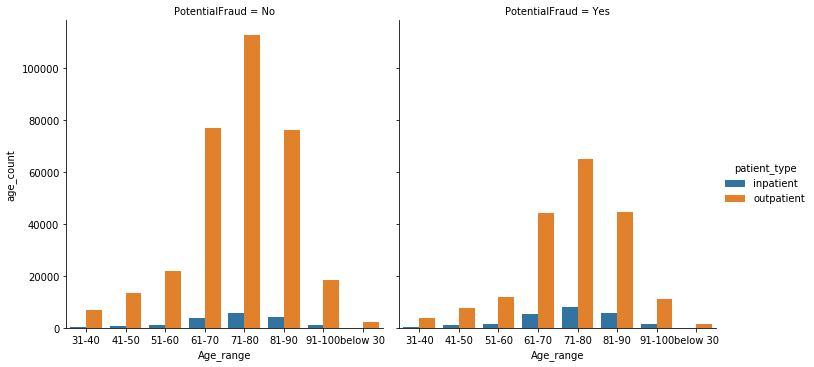

In [148]:
sns.catplot(data = age_data, x = 'Age_range', y = 'age_count', hue = 'patient_type', col = 'PotentialFraud', 
            kind = 'bar', )

## Race

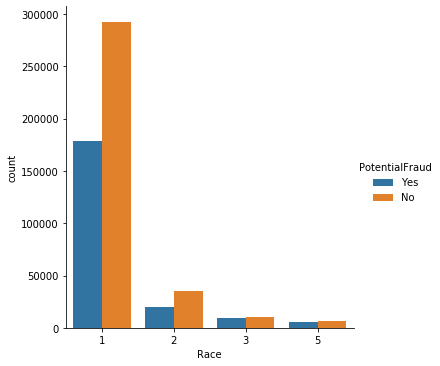

In [149]:
sns.catplot(data = patient_record, x = 'Race',  hue = 'PotentialFraud', 
            kind = 'count')

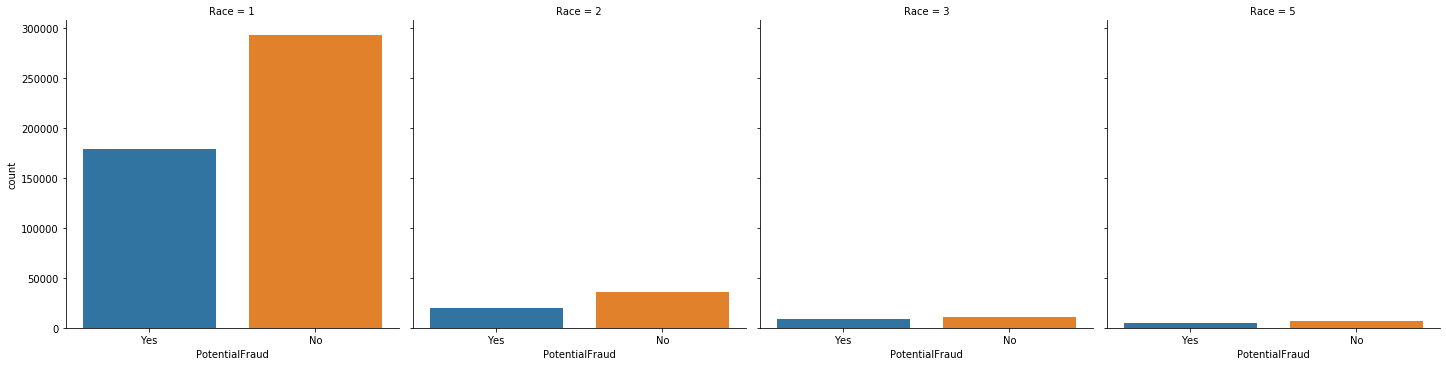

In [151]:
sns.catplot(data = patient_record, x = 'PotentialFraud',  col = 'Race', 
            kind = 'count')

In [36]:
patient_record.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'patient_type', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depressi

In [50]:
patient_record['days_admitted'] = (patient_record['ClaimEndDt'] - patient_record['ClaimStartDt']).dt.days.astype(int) 

In [51]:
patient_record['days_admitted'] = patient_record['days_admitted'] + 1

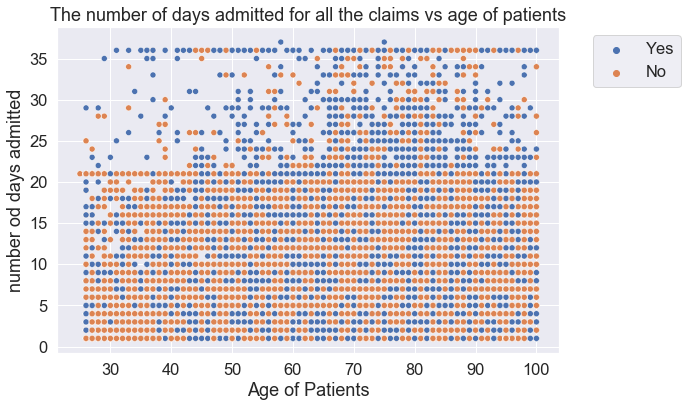

In [57]:
plt.rcParams['figure.figsize'] = (9, 6)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set(font_scale=1.5)
ax = sns.scatterplot(data = patient_record, x = 'Age', y = 'days_admitted', hue = 'PotentialFraud')
ax.set_title('The number of days admitted for all the claims vs age of patients')
ax.set(xlabel = 'Age of Patients', ylabel = 'number od days admitted')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [69]:
patient_record.patient_type.value_counts()

outpatient    517737
inpatient      40474
Name: patient_type, dtype: int64

In [62]:
patient_record = patient_record.replace({'ChronicCond_Alzheimer' :2, 'ChronicCond_Heartfailure' : 2, 
                                         'ChronicCond_KidneyDisease' :2,'ChronicCond_Cancer' :2, 
                                         'ChronicCond_ObstrPulmonary' :2 ,'ChronicCond_Depression' :2,
                                        'ChronicCond_Diabetes' :2, 'ChronicCond_IschemicHeart' :2,
                                         'ChronicCond_Osteoporasis' :2, 'ChronicCond_rheumatoidarthritis' :2,
                                        'ChronicCond_stroke' :2}, 0)


In [63]:
patient_record['RenalDiseaseIndicator'].value_counts()

0    448363
Y    109848
Name: RenalDiseaseIndicator, dtype: int64

In [64]:
#change the renal disease indicator in binary encoding(0,1)
patient_record = patient_record.replace({'RenalDiseaseIndicator' :'Y'},1 )
patient_record['RenalDiseaseIndicator'] =patient_record['RenalDiseaseIndicator'].astype(int)

In [65]:
chronic = patient_record.columns[patient_record.columns.str.contains("Chronic")].tolist() 

In [66]:
chronic_data = pd.concat([patient_record[chronic], patient_record['RenalDiseaseIndicator']], axis = 1)

In [67]:
chronic_condition = chronic_data.columns.to_list()

In [68]:
patient_record['chronic_count'] = patient_record[chronic_condition].sum(axis = 1)

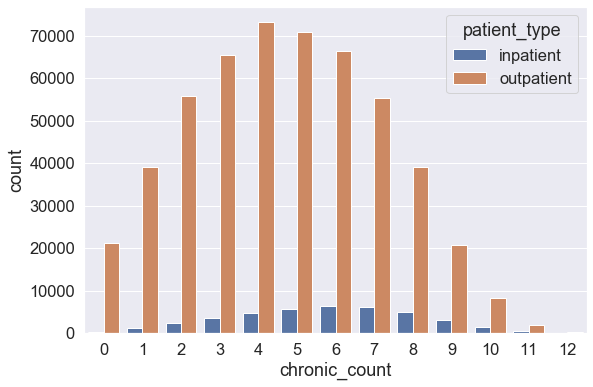

In [89]:
sns.countplot(data = patient_record, 
                x = 'chronic_count', hue = 'patient_type')

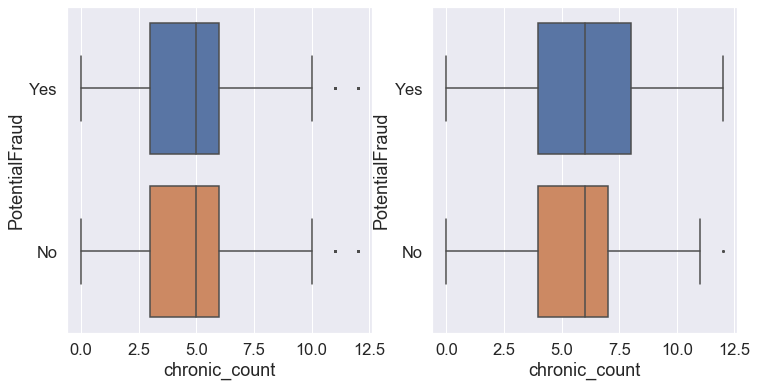

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data = patient_record[(patient_record['patient_type'] == 'outpatient')], 
                x = 'chronic_count', y = 'PotentialFraud', ax = ax[0], fliersize= 1);
sns.boxplot(data = patient_record[(patient_record['patient_type'] == 'inpatient')], 
                x = 'chronic_count', y = 'PotentialFraud', ax = ax[1], fliersize= 1);


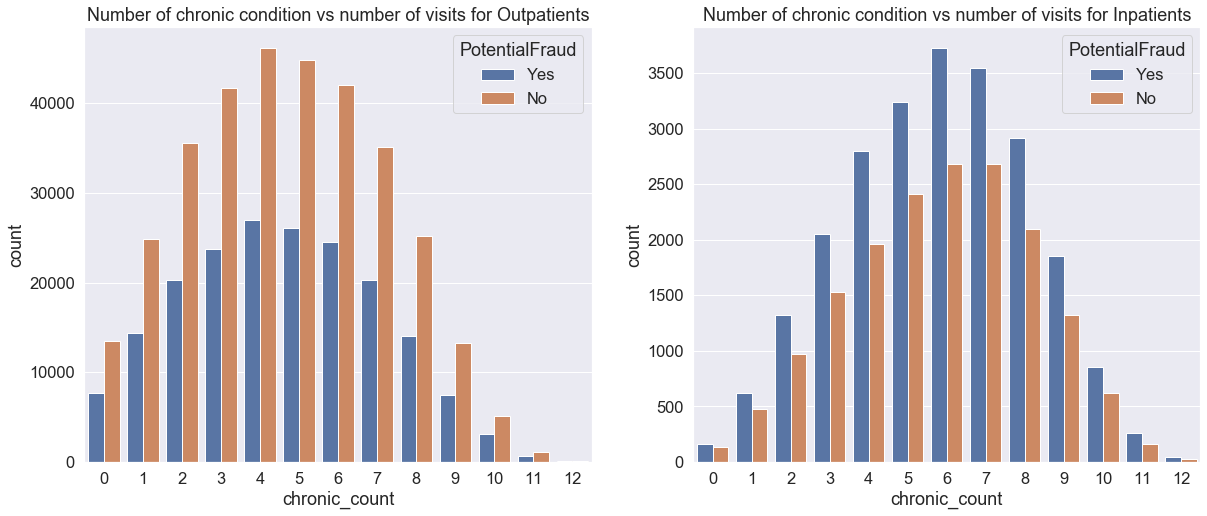

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(data = patient_record[(patient_record['patient_type'] == 'outpatient')], 
                x = 'chronic_count', hue = 'PotentialFraud', ax = ax[0]);
sns.countplot(data = patient_record[(patient_record['patient_type'] == 'inpatient')], 
                x = 'chronic_count', hue = 'PotentialFraud', ax = ax[1]);

ax[0].set_title('Number of chronic condition vs number of visits for Outpatients');
ax[1].set_title('Number of chronic condition vs number of visits for Inpatients');


